In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# تنظیم استایل برای زیبایی نمودار
sns.set_style("whitegrid")

# بارگذاری داده‌ها
penguins = pd.read_csv("C:/Users/A.S.T.co/Downloads/penguins.csv")
print(penguins)

    studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgerse

In [3]:
columns = ["Flipper Length (mm)", "Body Mass (g)","Species"]
penguins_non_missing = penguins[columns].dropna()  # حذف مقادیر گمشده

penguins_non_missing

,Flipper Length (mm),Body Mass (g),Species
0,181.0,3750.0,Adelie Penguin (Pygoscelis adeliae)
1,186.0,3800.0,Adelie Penguin (Pygoscelis adeliae)
2,195.0,3250.0,Adelie Penguin (Pygoscelis adeliae)
4,193.0,3450.0,Adelie Penguin (Pygoscelis adeliae)
5,190.0,3650.0,Adelie Penguin (Pygoscelis adeliae)
...,...,...,...
339,207.0,4000.0,Chinstrap penguin (Pygoscelis antarctica)
340,202.0,3400.0,Chinstrap penguin (Pygoscelis antarctica)
341,193.0,3775.0,Chinstrap penguin (Pygoscelis antarctica)
342,210.0,4100.0,Chinstrap penguin (Pygoscelis antarctica)


In [5]:
# تعریف X و y برای مدل رگرسیون
X = penguins_non_missing[["Flipper Length (mm)"]]  # متغیر مستقل
y = penguins_non_missing["Body Mass (g)"]          # متغیر وابسته

print(X )
print(y)

     Flipper Length (mm)
0                  181.0
1                  186.0
2                  195.0
4                  193.0
5                  190.0
..                   ...
339                207.0
340                202.0
341                193.0
342                210.0
343                198.0

[342 rows x 1 columns]
0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
339    4000.0
340    3400.0
341    3775.0
342    4100.0
343    3775.0
Name: Body Mass (g), Length: 342, dtype: float64


In [6]:
# ایجاد و آموزش مدل رگرسیون خطی
model = LinearRegression()
model.fit(X, y)



LinearRegression()

In [8]:
# پیش‌بینی مقادیر برای رسم خط رگرسیون
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # تولید مقادیر بین کمینه و بیشینه X
y_pred = model.predict(X_range)  # محاسبه مقادیر پیش‌بینی‌شده

y_pred

c:\Users\A.S.T.co\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2765.08606377, 2794.69665385, 2824.30724393, 2853.91783401,
       2883.52842409, 2913.13901417, 2942.74960425, 2972.36019433,
       3001.97078442, 3031.5813745 , 3061.19196458, 3090.80255466,
       3120.41314474, 3150.02373482, 3179.6343249 , 3209.24491498,
       3238.85550506, 3268.46609514, 3298.07668522, 3327.6872753 ,
       3357.29786538, 3386.90845546, 3416.51904554, 3446.12963562,
       3475.7402257 , 3505.35081578, 3534.96140586, 3564.57199594,
       3594.18258602, 3623.7931761 , 3653.40376618, 3683.01435626,
       3712.62494635, 3742.23553643, 3771.84612651, 3801.45671659,
       3831.06730667, 3860.67789675, 3890.28848683, 3919.89907691,
       3949.50966699, 3979.12025707, 4008.73084715, 4038.34143723,
       4067.95202731, 4097.56261739, 4127.17320747, 4156.78379755,
       4186.39438763, 4216.00497771, 4245.61556779, 4275.22615787,
       4304.83674795, 4334.44733803, 4364.05792811, 4393.66851819,
       4423.27910827, 4452.88969836, 4482.50028844, 4512.11087

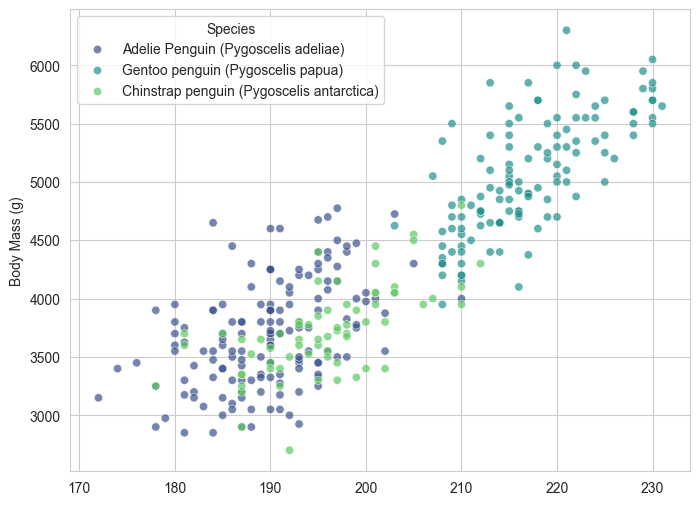

In [12]:
# رسم نمودار پراکندگی با رنگ‌بندی بر اساس گونه پنگوئن
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.values.flatten(), y=y, hue=penguins_non_missing["Species"], alpha=0.7, palette="viridis")
plt.show()


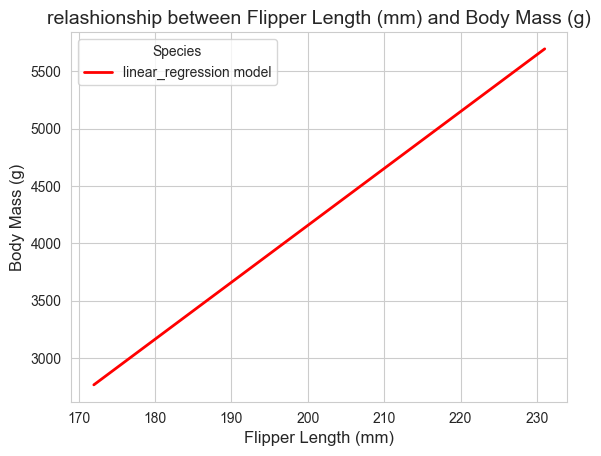

In [13]:
# رسم خط رگرسیون
plt.plot(X_range, y_pred, color="red", linewidth=2, label="linear_regression model")

# تنظیمات نمودار
plt.xlabel("Flipper Length (mm)", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)
plt.title("relashionship between Flipper Length (mm) and Body Mass (g)" , fontsize=14)
plt.legend(title="Species")
plt.show()

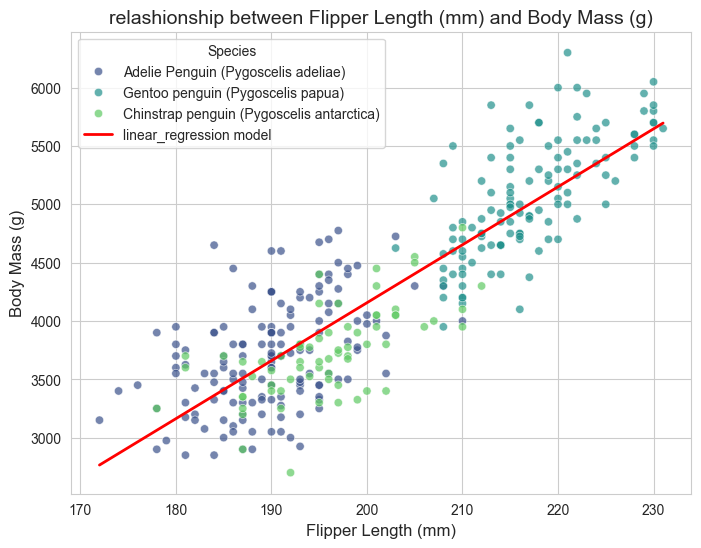

In [14]:
# رسم نمودار پراکندگی با رنگ‌بندی بر اساس گونه پنگوئن
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.values.flatten(), y=y, hue=penguins_non_missing["Species"], alpha=0.7, palette="viridis")
# رسم خط رگرسیون
plt.plot(X_range, y_pred, color="red", linewidth=2, label="linear_regression model")

# تنظیمات نمودار
plt.xlabel("Flipper Length (mm)", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)
plt.title("relashionship between Flipper Length (mm) and Body Mass (g)" , fontsize=14)
plt.legend(title="Species")
plt.show()